In [22]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import convolve2d as conv
from matplotlib import animation, rc, cm, pyplot as plt
from celluloid import Camera
from IPython.display import HTML
import numpy as np
from scipy.sparse import csr_matrix
from tqdm import tqdm
from IPython.display import clear_output
from time import sleep

from matplotlib import animation, rc
from IPython.display import HTML
from time import time

In [2]:
N = 1000
h = 1
dt = 1e-3

setup u-field

In [3]:
u = np.zeros(shape=(N + 3, N + 3))

In [4]:
u

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
pB = conv(u, np.zeros((2,2)), 'valid')

In [6]:
temp =np.arange(pB.shape[0])
p = np.vectorize(lambda x: x % 2>0)(temp.reshape(-1,1) + temp.reshape(1,-1))
B = np.vectorize(lambda x: x % 2==0)(temp.reshape(-1,1) + temp.reshape(1,-1))

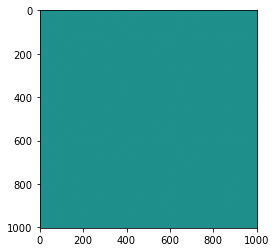

In [7]:
plt.imshow(B)

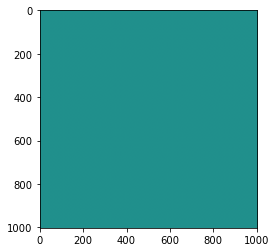

In [8]:
plt.imshow(p)

In [9]:
temp =np.arange(u.shape[0])
hu = np.vectorize(lambda x: x % 2>0)(temp.reshape(-1,1) + temp.reshape(1,-1))
vu = np.vectorize(lambda x: x % 2==0)(temp.reshape(-1,1) + temp.reshape(1,-1))

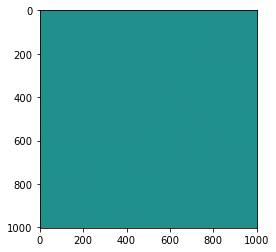

In [10]:
plt.imshow(hu)

In [ ]:
pB = np.zeros((N+2,N+2))
pB[0,0]=3
u = np.zeros(shape=(N + 3, N + 3))

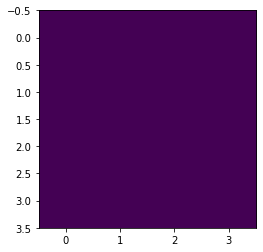

In [11]:
plt.imshow(pB[:4,:4])

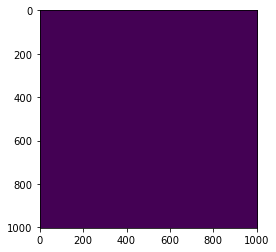

In [12]:
plt.imshow(u)

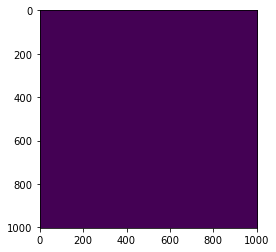

In [13]:
plt.imshow(pB)

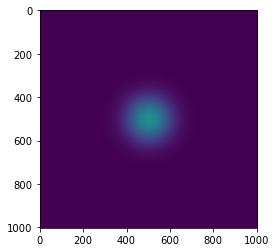

In [15]:
x = np.linspace(0,10,N + 2)
mesh = np.stack(np.meshgrid(x, x))
#pB = np.zeros((N+2,N+2))
#pB[0,0]=1
pB = np.exp(-np.sum(np.square(mesh-np.array([5,5]).reshape((2,1,1))), axis=0))*B
u = np.zeros(shape=(N + 3, N + 3))
plt.imshow((pB))

In [ ]:
pB = np.zeros((N+2,N+2))
B[50,50]=1
u = np.zeros(shape=(N + 3, N + 3))
v = pB.copy()
#u[4,4]=1
#u[-4,-4]=-1

In [16]:
R=np.random.uniform(0.1, 1, size=u.shape)*0+10000
mu=np.random.uniform(0.1, 1, size=u.shape)*0+1
eps=np.random.uniform(0.1, 1, size=u.shape)*0+1

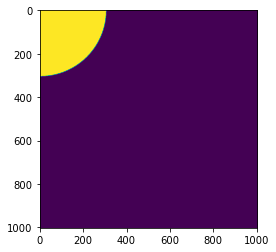

In [18]:
x = np.linspace(0,10,N + 3)
mesh = np.stack(np.meshgrid(x, x))
U = np.exp(-np.sum(np.square(mesh), axis=0))
plt.imshow(U>0.0001)
R[U>0.0001]=0.1

In [19]:
u.shape

(1003, 1003)

In [20]:
np.array([[1,0],[0,-1]])

array([[ 1,  0],
       [ 0, -1]])

In [21]:
np.array([[0,1],[-1,0]])

array([[ 0,  1],
       [-1,  0]])

In [24]:
tt = time()
for iter in range(100):
    dtB = conv(u, np.array([[1,1],[-1,-1]]), 'valid') / h**2 # Faradaysches Geseetz
    dtp = conv(u / R, np.array([[1,-1],[1,-1]]), 'valid')  # Kontinuitätsgesetz
    dtBp = B * dtB + p * dtp  # B und p sind indikatoren wo B-Feld und wo p-Feld werte sind in pB

    dthu = conv(pB, np.array([[1,0],[0,-1]]), 'full') # Amperesches Gesetz Teil 1
    dtvu = conv(pB, np.array([[0,1],[-1,0]]), 'full') # Amperesches Gesetz Teil 2
    dtu = (vu * dthu + hu * dtvu) * h / (eps * mu) - u / R / eps # Amperesches Gesetz 

    u += dtu * dt
    pB += dtBp * dt
print(time() - tt)

7.347389459609985


In [ ]:
np.array([[1,1],[-1,-1]])

In [ ]:
plt.imshow(dtu)

In [ ]:
plt.imshow((pB)[50:60,50:60])

In [ ]:
(pB)[50:60,50:60][2,2]-(pB)[50:60,50:60][3,3]

In [ ]:
plt.imshow(x[50:60,50:60]==-((pB)[50:60,50:60][2,2]-(pB)[50:60,50:60][3,3]))

In [ ]:
x=(conv(pB, np.array([[1,0],[0,-1]]), 'full'))
plt.imshow((x)[50:60,50:60])

In [ ]:
np.array([[0,1],[-1,0]])

In [ ]:
y=conv(pB, np.array([[0,1],[-1,0]]), 'full')
plt.imshow((y*hu)[50:60,50:60])

In [ ]:
plt.imshow(pB)

In [ ]:
plt.plot(ls)

In [ ]:
plt.imshow((pB*B)[40:60,40:60])
np.max((pB*B))

In [ ]:
plt.imshow((u)[40:60,40:60])


In [ ]:
    dthu = conv(pB, np.array([[0,1],[-1,0]]), 'full')
    dtvu = conv(pB, np.array([[1,0],[0,-1]]), 'full') 
    dtu = (hu * dthu + vu * dtvu) * h / (eps * mu)

In [ ]:
plt.imshow((dtu)[40:60,40:60])

In [ ]:
plt.imshow(dtBp[40:60,40:60])

In [ ]:
    dtB = -conv(u, np.array([[-1,1],[-1,1]]), 'valid') / h**2 
    dtp = -conv(u / R, np.array([[1,1],[-1,-1]]), 'valid')
    dtBp = B * dtB + p * dtp

In [ ]:
np.array([[-1,1],[-1,1]])

In [ ]:
    dtB = conv(dtu, np.array([[1,1],[-1,-1]]), 'valid') / h**2 
    dtp = -conv(dtu / R, np.array([[-1,1],[-1,1]]), 'valid')

In [ ]:
plt.imshow((dtB*B)[40:60,40:60])

In [ ]:
plt.imshow((dtB*B)[40:60,40:60])

In [ ]:
plt.imshow((u)[40:60,40:60])

In [ ]:
pB = np.zeros((N+2,N+2))

u = np.zeros(shape=(N + 3, N + 3))
v = pB.copy()
u[4,4]=1
u[-4,-4]=-1

In [ ]:
%%capture
camera = Camera(plt.figure())

for iter in range(1000):
    dtB = conv(u, np.array([[1,1],[-1,-1]]), 'valid') / h**2 
    dtp = -conv(u / R, np.array([[-1,1],[-1,1]]), 'valid')
    dtBp = B * dtB + p * dtp

    dthu = conv(pB, np.array([[1,0],[0,-1]]), 'full')
    dtvu = conv(pB, np.array([[0,1],[-1,0]]), 'full') 
    dtu = (vu * dthu + hu * dtvu) * h / (eps * mu) - u / R / eps

    u += dtu * dt
    pB += dtBp * dt
    if iter % 100 ==0:
        plt.imshow((u),vmin=-1, vmax=1)
        camera.snap()
anim = camera.animate(blit=True)
clear_output()

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
plt.imshow((pB*p))

In [ ]:
np.sum(np.square(pB) * B)

In [ ]:
np.sum(np.square(pB * p))

In [ ]:
np.max(u)

In [ ]:
plt.imshow(u[:20,:20])

In [ ]:
u[0,1]-u[0,2]-u[1,1]+u[1,2]

In [ ]:
np.sum(np.square(pB) * B)# + np.sum(np.square(u))

In [ ]:
conv(u, np.array([[1,1],[-1,-1]]), 'valid')[0,1]

In [ ]:
(conv(u, np.array([[1,1],[-1,-1]]), 'valid'))[0,1]

In [ ]:
np.array([[1,1],[-1,-1]])

In [ ]:
u[:4,:4]